In [71]:
import panel as pn
from panel.interact import interact
pn.extension()

import hvplot.pandas

import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

import polars as pl

## Reconfigurar Datasets

## df_c = 'coursera_courses'
### Me voy a quedar solo con 'course_id'

In [106]:
dtypes_c = {
 'course_id': pl.Utf8
}
df_c = pl.read_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\Coursera_courses.csv", dtypes = dtypes_c);
df_c = df_c.select(pl.col('course_id'))
pd_c = df_c.to_pandas()

### Busco nulos en df_c

In [107]:
df_c.null_count()

course_id
u32
0


In [108]:
pd_c[['course_id-split-0-lpxo', 
      'course_id-split-1-lpxo', 
      'course_id-split-2-lpxo', 
      'course_id-split-3-lpxo', 
      'course_id-split-4-lpxo', 
      'course_id-split-5-lpxo', 
      'course_id-split-6-lpxo', 
      'course_id-split-7-lpxo', 
      'course_id-split-8-lpxo']] = pd_c['course_id'].str.split('-', n=-1, expand=True, regex=None)



In [109]:
pd_c = pd_c[pd_c.columns[:1].tolist() + ['course_id-split-0-lpxo', 
                                         'course_id-split-1-lpxo', 
                                         'course_id-split-2-lpxo', 
                                         'course_id-split-3-lpxo', 
                                         'course_id-split-4-lpxo', 
                                         'course_id-split-5-lpxo', 
                                         'course_id-split-6-lpxo', 
                                         'course_id-split-7-lpxo', 
                                         'course_id-split-8-lpxo'] + pd_c.columns[1:-9].tolist()]

In [110]:
# Deleted columns course_id
pd_c.drop(['course_id'], axis=1, inplace=True)

In [113]:
pd_c.to_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\coursera.csv")

In [114]:
df_c = pl.read_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\coursera.csv")

In [120]:
df_c_final = pl.concat([df_c.select(pl.col('course_id-split-0-lpxo').alias('course_id')),
                        df_c.select(pl.col('course_id-split-1-lpxo').alias('course_id')), 
                        df_c.select(pl.col('course_id-split-2-lpxo').alias('course_id')), 
                        df_c.select(pl.col('course_id-split-3-lpxo').alias('course_id')), 
                        df_c.select(pl.col('course_id-split-4-lpxo').alias('course_id')), 
                        df_c.select(pl.col('course_id-split-5-lpxo').alias('course_id')), 
                        df_c.select(pl.col('course_id-split-6-lpxo').alias('course_id')), 
                        df_c.select(pl.col('course_id-split-7-lpxo').alias('course_id')), 
                        df_c.select(pl.col('course_id-split-8-lpxo').alias('course_id'))],how='vertical')

In [123]:
df_c = df_c_final.drop_nulls()

### Salvo df_c en formato parquet con el nombre de 'coursera.parquet'

In [124]:
df_c.write_parquet(r"C:\Users\ornal\Desktop\Data Analitics\Test\coursera.parquet")
df_c.write_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\coursera.csv")

## df_e = edx_courses
### Me voy a quedar con:
### 'title', 'n_enrolled', 'course_type', 'Level', 'subject', 'language', 'course_effort', 'course_length', 'price'

In [75]:
df_e = pl.read_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\edx_courses.csv", 
                   null_values=['NA','NaN'])

df_e = df_e.select(['title','n_enrolled','course_type','Level','subject','language','course_effort','course_length','price'])

### Busco nulos en df_e

In [76]:
df_e.null_count()

title,n_enrolled,course_type,Level,subject,language,course_effort,course_length,price
u32,u32,u32,u32,u32,u32,u32,u32,u32
0,120,0,0,0,0,0,0,0


### Voy a eliminar los nulos en df_e

In [77]:
df_e = df_e.filter(pl.col('*').is_not_null())

### Salvo df_e en formato parquet con el nombre de 'edx.parquet'

In [78]:
df_e.write_parquet(r"C:\Users\ornal\Desktop\Data Analitics\Test\edx.parquet")
df_e.write_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\edx.csv")

## df_u = udemy_courses
### Me voy a quedar con:
### 'course_title', 'course_title', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level', 'content_duration', 'published_timestamp', 'subject'

In [79]:
df_u = pl.read_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\udemy_courses.csv", 
                   null_values=['NA','NaN'])

### Busco nulos en df_u

In [80]:
df_u.null_count()

course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
df_u['level'].unique()

level
str
"""Expert Level"""
"""Beginner Level..."
"""Intermediate L..."
"""All Levels"""


### Salvo df_u en formato parquet con el nombre de 'udemy.parquet'

In [82]:
df_u.write_parquet(r"C:\Users\ornal\Desktop\Data Analitics\Test\udemy.parquet")
df_u.write_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\udemy.csv")

## dfu_group_level (•	Nivel de ventas según nivel)
### DataFrame con datos de Udemy agrupado por nivel de complejidad
### Agrega(precio promedio, promedio de reseñas, promedio de cuantas clases tienen los cursos, promedio de duracion de los cursos) 

In [83]:
dfu_group_level = (
  df_u
  .groupby('level')
  .agg(
  [
    pl.col('price').mean().alias('precio_promedio'),
    pl.col('num_reviews').mean().alias('promedio_reseñas'),
    pl.col('num_lectures').mean().alias('cant_clases_promedio'),
    pl.col('content_duration').mean().alias('duracion_promedio(h)')
  ]
  )  
)

In [84]:
dfu_group_level

level,precio_promedio,promedio_reseñas,cant_clases_promedio,duracion_promedio(h)
str,f64,f64,f64,f64
"""Expert Level""",91.12069,40.224138,30.775862,2.90546
"""Intermediate L...",61.92399,92.674584,35.935867,3.733333
"""All Levels""",73.022291,209.588906,45.981337,4.869656
"""Beginner Level...",55.681102,101.633858,32.998425,3.091194


## dfu_group_level_subject (•	Nivel de ventas según nivel) + Tipo Cursos
### DataFrame con datos de Udemy agrupado por nivel de complejidad/tipo de cursos
### Agrega(precio promedio, promedio de reseñas, promedio de cuantas clases tienen los cursos, promedio de duracion de los cursos) 

In [85]:
dfu_group_level_subject = (
  df_u
  .groupby(['level','subject'])
  .agg(
  [
    pl.col('price').mean().alias('precio_promedio'),
    pl.col('num_reviews').mean().alias('promedio_reseñas'),
    pl.col('num_lectures').mean().alias('cant_clases_promedio'),
    pl.col('content_duration').mean().alias('duracion_promedio(h)')
  ]
  )  
)

## dfu_group_year
### Dataframe con datos de Udemy agrupado por años
### Agrega(Cantidad de cursos por año)

In [86]:
dfu_group_year = (
  pl.read_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\udemy_courses.csv", parse_dates=True)
  .with_column(pl.col('published_timestamp').cast(pl.Datetime).dt.year().alias('year'))  
  .groupby('year')
  .agg(
  [
    pl.col('price').count().alias('cantidad_cursos')
  ]
  )
  .sort('year')  
)

In [87]:
dfu_group_year.to_pandas().hvplot('year','cantidad_cursos')

:Curve   [year]   (cantidad_cursos)

## dfu_group_precio (•	Nivel de ventas según precio.)
### DataFrame con datos de Udemy agrupados por precio
### Agrega(Cantidad Vendida)

In [88]:
dfu_group_precio = (
  df_u
  .filter(pl.col('price') != 0)  
  .groupby('price')
  .agg(
  [
    pl.col('price').count().alias('cantidad_cursos')
  ]
  )
  .sort('price')  
)

In [89]:
dfu_group_precio.to_pandas().hvplot('price','cantidad_cursos')

:Curve   [price]   (cantidad_cursos)

## Me gustaria analizar una posible relacion entre complejidad/precio/cant venta

In [90]:
dfu_group_level1 = (
  df_u
  .groupby('level')
  .agg(
  [
    pl.col('price').mean().alias('precio_promedio'),
    pl.col('price').count().alias('cantidad_cursos')
  ]
  )
  .sort(['level','precio_promedio'])  
)
dfu_group_level1 = dfu_group_level1.with_column(pl.col('level').alias('nivel_complejidad'))
dfu_group_level1 = dfu_group_level1.select(pl.exclude('level'))

### Ordenar la columna level

In [91]:
dfu_group_level1 = (
       dfu_group_level1.with_column(pl.col('nivel_complejidad')
       .apply(lambda x: '1'+x if x == 'All Levels' else x)                 
       .apply(lambda x: '2'+x if x == 'Beginner Level' else x)                 
       .apply(lambda x: '3'+x if x == 'Intermediate Level' else x)                                  
       .apply(lambda x: '4'+x if x == 'Expert Level' else x)                                  
       .alias('level1'))
       .sort('level1') 
       ) 
dfu_group_level1 = dfu_group_level1.select(pl.exclude('level1'))
#df_u.head()

In [92]:
dfu_group_level1.to_pandas().hvplot('nivel_complejidad','cantidad_cursos')

:Curve   [nivel_complejidad]   (cantidad_cursos)

## df_r = Coursera_reviews

In [93]:
df_r = pl.read_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\coursera_reviews.csv", 
                   null_values=['NA','NaN'])

### Busco nulos en df_r

In [94]:
df_r.null_count()

reviews,reviewers,date_reviews,rating,course_id
u32,u32,u32,u32,u32
95,0,0,0,0


### Voy a eliminar los nulos en df_r

In [95]:
df_r = df_r.filter(pl.col('*').is_not_null())

### Salvo df_r en formato parquet con el nombre de 'reviews.parquet'

In [96]:
df_r.write_parquet(r"C:\Users\ornal\Desktop\Data Analitics\Test\reviews.parquet")
df_r.write_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\reviews.csv")

In [27]:
import math

## dfr_group_rating = (•	Nivel de ventas según rating)
### DataFrame con datos de Review Coursera agrupados por rating
### agrega(cantidad_cursos)

In [28]:
dfr_group_rating = (
  df_r
  .groupby('course_id')
  .agg(
  [
    pl.col('rating').mean().alias('rating_promedio'),
    pl.col('rating').count().alias('cantidad')  
  ]
  )  
)



In [29]:
dfr_group_rating = dfr_group_rating.with_column(pl.col('rating_promedio')
                   .apply(lambda x: math.modf(x)[1] if (math.modf(x)[0] > 0 and math.modf(x)[0] < 5) else round(x))                             
                   )



In [30]:
dfr_group_rating_prom = (
  dfr_group_rating
  .groupby('rating_promedio')
  .agg(
  [
    pl.col('course_id').count().alias('cantidad_cursos')
  ]
  )
  .sort('rating_promedio')  
)

In [31]:
dfr_group_rating_prom.to_pandas().hvplot('rating_promedio','cantidad_cursos')

:Curve   [rating_promedio]   (cantidad_cursos)

## Columnas

In [32]:
df_c = pd.read_csv(r"C:\Users\ornal\Desktop\Data Analitics\Test\Coursera_courses.csv");

In [33]:
pn.Column('# A','# B','# C')

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)

## Filas

In [34]:
pn.Row('# A','# B','# C',background = 'LightGray')

Row(background='LightGray')
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)

# Widgets

## slider + funcion + interact

In [35]:
# create a widget
slider = pn.widgets.IntSlider(start=1,end=10,value=5,name='slider widget')

def f(x):
    return x*x

interact(f,x=slider)

Column
    [0] Column
        [0] IntSlider(end=10, name='slider widget', start=1, value=5)
    [1] Row
        [0] Str(int, name='interactive01224')

## funcion + interact
## generan el widget automaticamente

In [36]:
def f(x):
    return x+x

interact(f, x=(1,10))

Column
    [0] Column
        [0] IntSlider(end=10, name='x', start=1, value=5)
    [1] Row
        [0] Str(int, name='interactive01233')

## widget with decorator

In [37]:
@interact(x=(1,10))
def f(x):
    return '#'+str(x+20)+'M'
f

Column
    [0] Column
        [0] IntSlider(end=10, name='x', start=1, value=5)
    [1] Row
        [0] Markdown(str, name='interactive01243')

## Otros ejemplos

In [38]:
@interact(x=True)
def f(x):
    return x
f

Column
    [0] Column
        [0] Checkbox(name='x', value=True)
    [1] Row
        [0] Str(bool, name='interactive01253')

In [39]:
@interact(x=['Ambos','Masculino','Femenino'])
def f(x):
    return x
f

Column
    [0] Column
        [0] Select(name='x', options=['Ambos', 'Masculino', ...], value='Ambos')
    [1] Row
        [0] Markdown(str, name='interactive01263')

In [40]:
@interact(x='Hello')
def f(x):
    return x
f

Column
    [0] Column
        [0] TextInput(name='x', value='Hello')
    [1] Row
        [0] Markdown(str, name='interactive01273')

## Text

In [41]:
static_text = pn.widgets.StaticText(name='nombre',value='Ornaldo')
static_text

StaticText(name='nombre', value='Ornaldo')

In [42]:
string = pn.pane.Str('Esto es una cadena')
string

Str(str)

In [43]:
scrolling_text = pn.panel('<marquee>Here is some custom HTML</marquee>')
#scrolling_text

## TextBox & Button

In [44]:
# create widgts
text_box = pn.widgets.TextInput(name='Teclee el Nombre',value='')
text = pn.widgets.StaticText()

#create function
def hello(event):
    text.value = f'Hola {text_box.value}. Tenga un buen dia.'
    
# create button widget
button = pn.widgets.Button(name='cliCk',button_type='primary')

# button event 
button.on_click(hello)

# layout
pn.Column(text_box,button,text)

Column
    [0] TextInput(name='Teclee el Nombre')
    [1] Button(button_type='primary', name='cliCk')
    [2] StaticText()

## Dropdown Menu

In [45]:
promedios = list(dfr_group_rating.to_pandas()['rating_promedio'].unique())
promedios

[4.0, 3.0, 5.0, 1.0]

In [46]:
# create widget
select = pn.widgets.Select(name='Select',options=promedios)

# create function
def create_plot(promedio):
    return dfr_group_rating.filter(pl.col('rating_promedio')==promedio).to_pandas().hvplot('course_id','cantidad')

# create interaction
interact(create_plot, promedio=select)



Column
    [0] Column
        [0] Select(options=[4.0, 3.0, 5.0, 1.0], value=4.0)
    [1] Row
        [0] HoloViews(Curve, name='interactive01299')

In [47]:
tipos = ['Precio','Nivel Complejidad','Rating','Idioma']

In [48]:
# creo el widget
select = pn.widgets.Select(name='Seleccionar Tipo',options = tipos)

# funcion
def ventas_por_tipo(tipo):
    match tipo:
        case 'Precio':
            return dfu_group_precio.to_pandas().hvplot('price','cantidad_cursos')
        case 'Nivel Complejidad':    
            return dfu_group_level1.to_pandas().hvplot('nivel_complejidad','cantidad_cursos')
        case 'Rating':
            return dfr_group_rating_prom.to_pandas().hvplot('rating_promedio','cantidad_cursos')
        case _:
            return dfu_group_precio.to_pandas().hvplot('price','cantidad_cursos')
    #    action-default
    #return dfr_group_rating.filter(pl.col('rating_promedio')==promedio).to_pandas().hvplot('course_id','cantidad')

# create interaction
interact(ventas_por_tipo, tipo=select)

Column
    [0] Column
        [0] Select(name='Seleccionar Tipo', options=['Precio', 'Nivel Compleji...], value='Precio')
    [1] Row
        [0] HoloViews(Curve, name='interactive01412')

## Mismo ejemplo que el anterior pero usando depends decorator

In [68]:
# creo el widget
select = pn.widgets.Select(name='Seleccionar Tipo',options = tipos)

# funcion usando depend decorator
@pn.depends(select)
def ventas_por_tipo(tipo):
    match tipo:
        case 'Precio':
            return dfu_group_precio.to_pandas().hvplot('price','cantidad_cursos')
        case 'Nivel Complejidad':    
            return dfu_group_level1.to_pandas().hvplot('nivel_complejidad','cantidad_cursos')
        case 'Rating':
            return dfr_group_rating_prom.to_pandas().hvplot('rating_promedio','cantidad_cursos')
        case _:
            return dfu_group_precio.to_pandas().hvplot('price','cantidad_cursos')
    #    action-default
    #return dfr_group_rating.filter(pl.col('rating_promedio')==promedio).to_pandas().hvplot('course_id','cantidad')

# layout
# podia ser tambien pn.Row()
columna1 = pn.Column(
  pn.Column(select),
  ventas_por_tipo  
)
columna1

Column
    [0] Column
        [0] Select(name='Seleccionar Tipo', options=['Precio', 'Nivel Compleji...], value='Precio')
    [1] ParamFunction(function)

## Mismo ejemplo usando callback

In [50]:
# creo el widget
select = pn.widgets.Select(name='Seleccionar Tipo',options = tipos)

# funcion 
def ventas_por_tipo(tipo):
    match tipo:
        case 'Precio':
            return dfu_group_precio.to_pandas().hvplot('price','cantidad_cursos')
        case 'Nivel Complejidad':    
            return dfu_group_level1.to_pandas().hvplot('nivel_complejidad','cantidad_cursos')
        case 'Rating':
            return dfr_group_rating_prom.to_pandas().hvplot('rating_promedio','cantidad_cursos')
        case _:
            return dfu_group_precio.to_pandas().hvplot('price','cantidad_cursos')
    #    action-default
    #return dfr_group_rating.filter(pl.col('rating_promedio')==promedio).to_pandas().hvplot('course_id','cantidad')

# layout
layout = pn.Column(
  pn.Column(select),
  ventas_por_tipo(select.options[0]) 
)

# callback
def update(event):
    layout[1].object = ventas_por_tipo(select.value)
    
# actualizar o reemplazar el componente cuando el parametro cambie
select.param.watch(update,'value')

#retorna el objeto panel para imprimirlo en el notebook
layout.servable()

Column
    [0] Column
        [0] Select(name='Seleccionar Tipo', options=['Precio', 'Nivel Compleji...], value='Precio')
    [1] HoloViews(Curve)

## Checkbox

### Ejemplo usando depends decorator

In [51]:
#widget
checkbox = pn.widgets.Checkbox(name='Checkbox')

# funcion
@pn.depends(checkbox)
def checked(x):
    if x == True:
        return 'checked'
    else:
        return 'not checked'
    
# interaccion
pn.Column(pn.Column(checkbox),checked)
    

Column
    [0] Column
        [0] Checkbox()
    [1] ParamFunction(function)

## toggle on/off chart element

In [52]:
# datos
dfu_group_precio.head()

price,cantidad_cursos
i64,u32
20,830
25,154
30,166
35,116
40,217


In [53]:
# widget
fit_line_checkbox = pn.widgets.Checkbox(name='fit_line')

# plot
scatter_price_cantidad = hv.Scatter(data=df_u,kdims='precio',vdims='cantidad')
scatter_price_cantidad.opts(line_color='black',width=600,size=10)

# function
@pn.depends(fit_line_checkbox)
def fit_line(x):
    if x== True:
        return scatter_price_cantidad * hv.Slope.from_scatter(scatter_price_cantidad)
    else:
        return scatter_price_cantidad
    
pn.Column(pn.Column(fit_line_checkbox), fit_line)    


Column
    [0] Column
        [0] Checkbox(name='fit_line')
    [1] ParamFunction(function)

## Radio Buttons

In [ ]:
#import geoviews as gv
#gv.extension('boked')

In [ ]:
# widget
radio_buttons = pn.widgets.RadioButtonGroup(options=['Uno','Dos','Tres'])

#funcion
@pn.depends(radio_buttons)
def map_type(x):
    match x:
        case 'Uno':
            return gv.tile_sources.CartoMidnight.opts(title='CartoMidnight',width=800,height=400)
        case 'Dos':    
            return gv.tile_sources.OSM.opts(title='OSM',width=800,height=400)
        case _:
            return gv.tile_sources.Wikipedia.opts(title='Wikipedia',width=800,height=400)
        
# interaccion
interact(map_type, x=radio_buttons)

## Tabs

In [65]:
# widgets
tabs = pn.Tabs()

# funciones
@interact(x=(1,10))
def f1(x): return x+1

@interact(x=(1,10))
def f2(x): return x+2

@interact(x=(1,10))
def f3(x): return x+3

tabs.extend(
[
 ('text',pn.widgets.TextInput()),
 ('color',pn.widgets.ColorPicker()),
 ('function 1',f1)   ,
 ('function 2',f2),
 ('function 3',f3)   
]
)
tabs

Tabs
    [0] TextInput()
    [1] ColorPicker()
    [2] Column
        [0] Column
            [0] IntSlider(end=10, name='x', start=1, value=5)
        [1] Row
            [0] Str(int, name='interactive01951')
    [3] Column
        [0] Column
            [0] IntSlider(end=10, name='x', start=1, value=5)
        [1] Row
            [0] Str(int, name='interactive01959')
    [4] Column
        [0] Column
            [0] IntSlider(end=10, name='x', start=1, value=5)
        [1] Row
            [0] Str(int, name='interactive01967')

## Link Widgets to plot with jslink

In [56]:
pd_u = df_u.to_pandas()

In [57]:
pd_u.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [58]:
# widgets
size = pn.widgets.IntSlider(value=10,start=1,end=20,name='size')
color = pn.widgets.ColorPicker(name='color picker')
alpha = pn.widgets.FloatSlider(value=0.5,start=0,end=1,name='alpha')

#plot
scatter = hv.Scatter(data=pd_u,kdims='num_subscribers',vdims='num_reviews')
scatter.opts(line_color='black',width=600)

#link
size.jslink(scatter,value='glyph.size')
color.jslink(scatter, value='glyph.fill_color')
alpha.jslink(scatter, value='glyph.fill_alpha')

#layout
pn.Row(scatter * hv.Slope.from_scatter(scatter), pn.Column(size,color,alpha))

Row
    [0] HoloViews(Overlay)
    [1] Column
        [0] IntSlider(end=20, name='size', start=1, value=10)
        [1] ColorPicker(name='color picker')
        [2] FloatSlider(name='alpha', value=0.5)

## Dashboard

In [59]:
levels = list(df_u['level'].unique())
levels

['Beginner Level', 'All Levels', 'Intermediate Level', 'Expert Level']

In [60]:
png = pn.panel('Images.png', width=200)

Column
    [0] PNG(str, width=200)
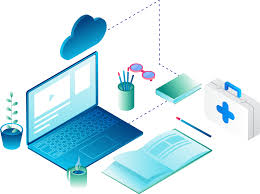

In [61]:
column_sidebar = pn.Column(png)
#column.append('\n')
column_sidebar

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [2127271239136] Row
        [0] Column
            [0] Column
                [0] Column
                    [0] Select(name='Seleccionar Tipo', options=['Precio', 'Nivel Compleji...], value='Rating')
                [1] ParamFunction(function)
    [2127271155008] PNG(str, width=200)
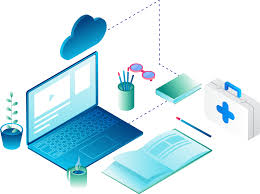

In [69]:
template = pn.template.FastListTemplate(
 title = 'Cursos Online',
 sidebar = column_sidebar,
 main=[pn.Row(pn.Column(columna1))
   
 ]   
)
template.servable()
